In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [104]:
data = pd.read_csv("03-01-2022-results.csv")
data = data.sort_values('acc_test')
data = data[data.n!=50000]
data

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
78,78,84,56,0.1,256,50,False,0.20,10000,2
197,197,83,56,0.1,256,50,False,0.05,10000,2
139,139,83,56,0.1,256,50,False,0.10,10000,2
193,193,83,56,0.1,256,50,False,0.05,10000,2
134,134,83,56,0.1,256,50,False,0.10,10000,2
...,...,...,...,...,...,...,...,...,...,...
102,102,99,84,0.1,256,50,True,0.20,100000,2
42,42,99,84,0.1,256,50,True,0.30,100000,2
41,41,99,84,0.1,256,50,True,0.30,100000,2
169,169,99,84,0.1,256,50,True,0.10,100000,2


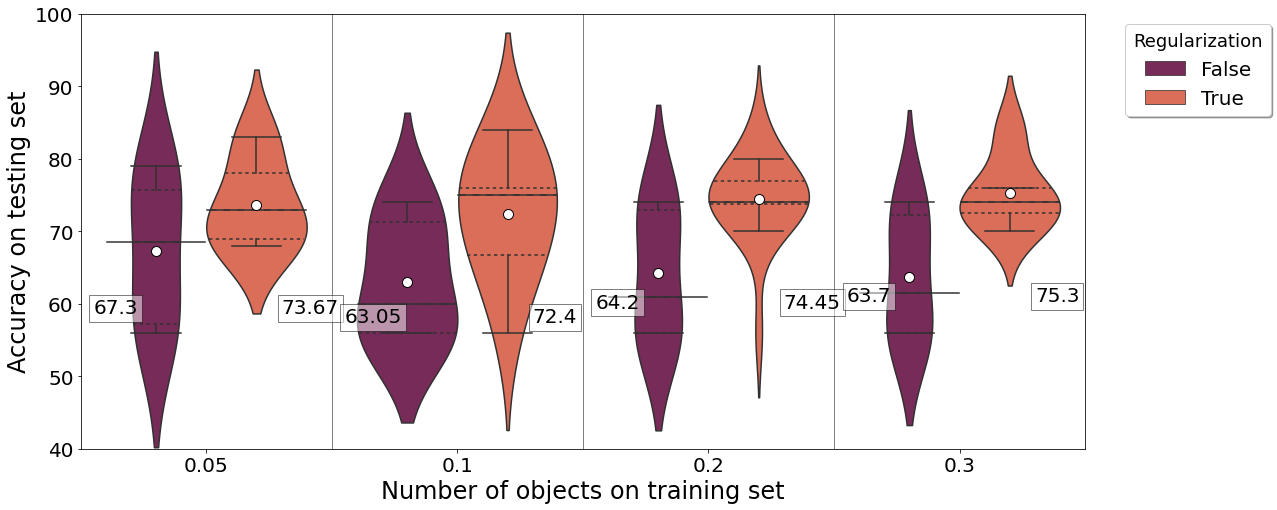

In [105]:
plt.figure(figsize=(18,8))
plt.ylim(40,100)
sns.boxplot(x="EPS1", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="EPS1",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==True)].groupby(['EPS1'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False)].groupby(['EPS1'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,2)]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,2)]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i]-15, stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, stringlist_false[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['EPS1'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)

In [106]:
#data = pd.read_csv("28-12-2021-results.csv")
#data = data[(data.n!=20000)]
#data = data.sort_values('acc_test')
#data

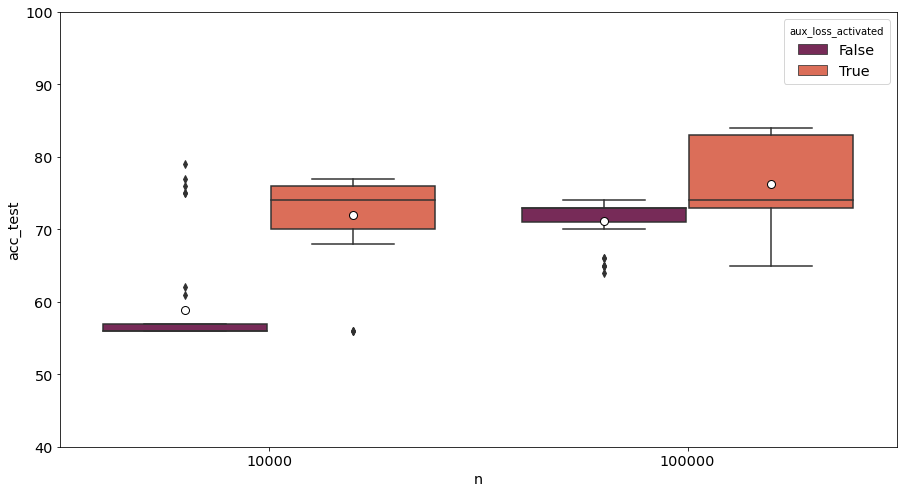

In [107]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
ax = sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})


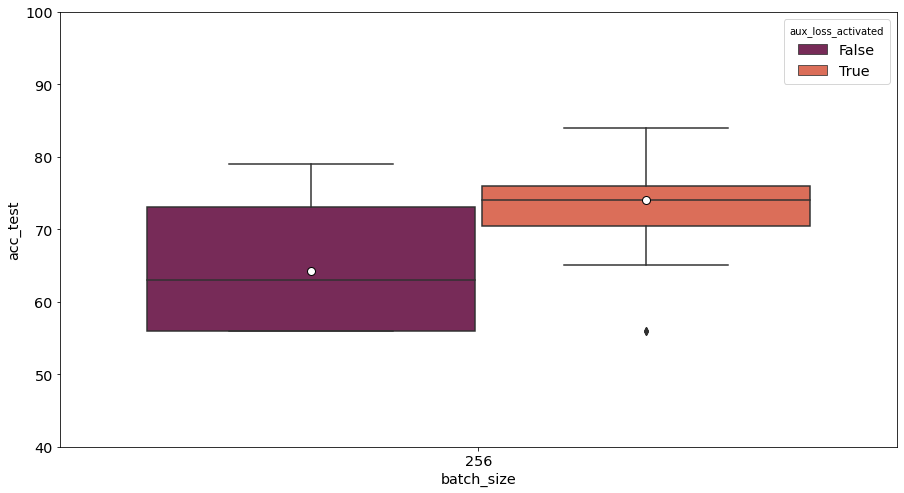

In [108]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
ax = sns.boxplot(x="batch_size", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data[(data.opt==2)
                                                                                                                           
        ],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

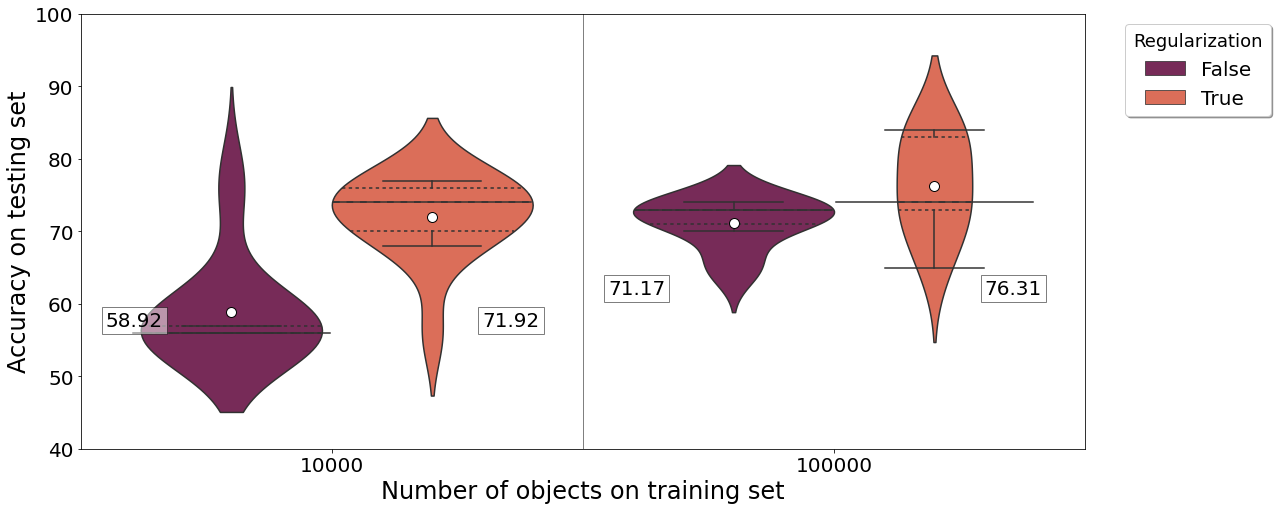

In [109]:
plt.figure(figsize=(18,8))
plt.ylim(40,100)
sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="n",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==True) ].groupby(['n'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False) ].groupby(['n'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,2)]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,2)]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i]-15, stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, stringlist_false[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)

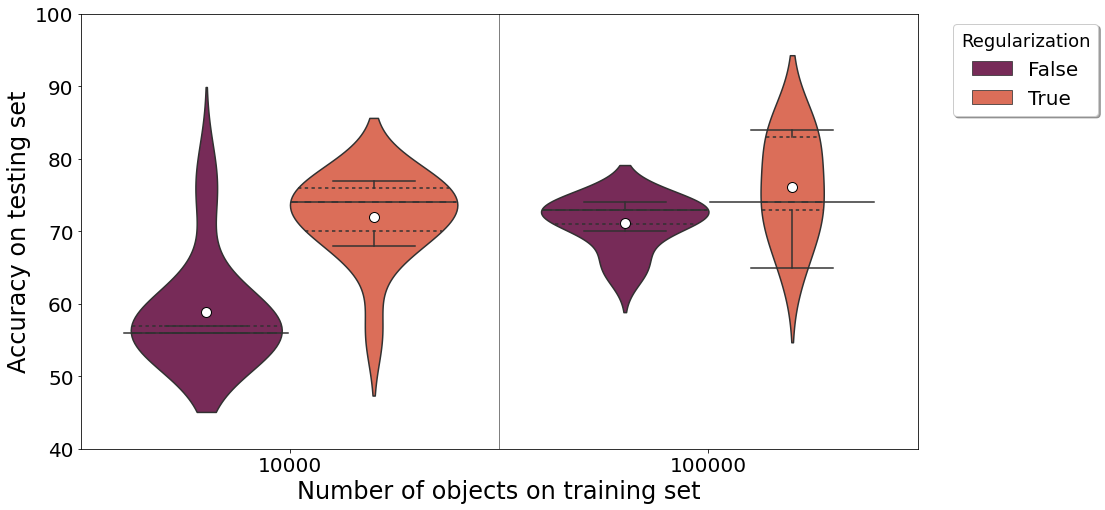

In [102]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot(x="n",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

yposlist = data[(data.aux_loss_activated==True) & (data.opt==1)].groupby(['n'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False) & (data.opt==1)].groupby(['n'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in yposlist]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in yposlist_false]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i]-15, stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, stringlist_false[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)

In [165]:
 data[(data.aux_loss_activated==False) & (data.batch_size>128)]

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
933,933,91,47,0.1,512,4,False,0.001,10000,2
915,915,96,47,0.1,512,4,False,0.001,5000,2
966,966,91,47,0.1,512,4,False,0.001,50000,1
993,993,92,47,0.1,512,4,False,0.001,100000,2
904,904,96,48,0.1,512,4,False,0.001,5000,1
...,...,...,...,...,...,...,...,...,...,...
794,794,99,86,0.1,256,4,False,0.001,100000,2
797,797,99,86,0.1,256,4,False,0.001,100000,2
783,783,99,87,0.1,256,4,False,0.001,100000,1
785,785,99,87,0.1,256,4,False,0.001,100000,1


In [101]:
from scipy import stats
from scipy.stats import wilcoxon, ttest_ind, ttest_rel


for n in data.n.unique():
    samples1 = data[(data.aux_loss_activated==False) & (data.batch_size>128)].acc_test.to_list()
    samples2 = data[(data.aux_loss_activated==True) & (data.batch_size>128)].acc_test.to_list()
    print(n)
    print(np.mean(samples1))
    print(np.mean(samples2))
           
    stat, p = ttest_rel(samples1, samples2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    
        

10000
64.17142857142858
73.86486486486487


ValueError: unequal length arrays

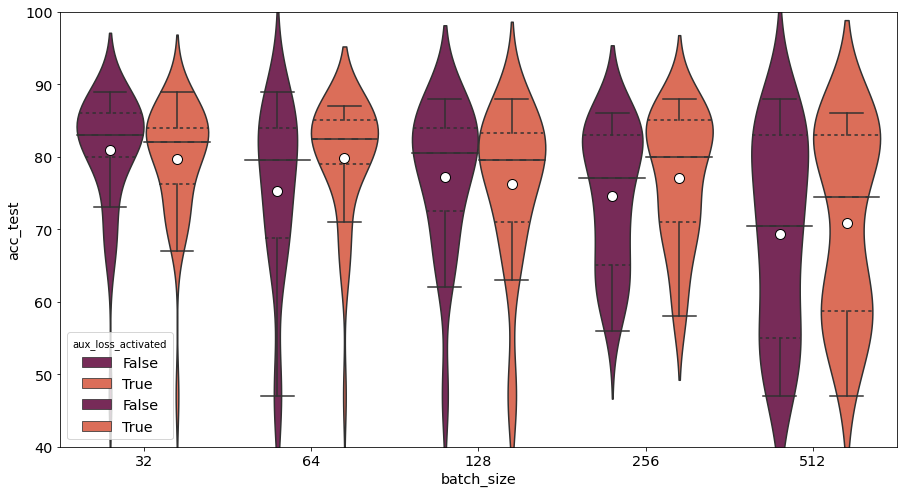

In [8]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
sns.boxplot(x="batch_size", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data[data.opt==2],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot(x="batch_size",bw=0.5, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data[(data.opt==2)
                                                                                                                                      
                                                                                                                           
                                                                                                                           ],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})


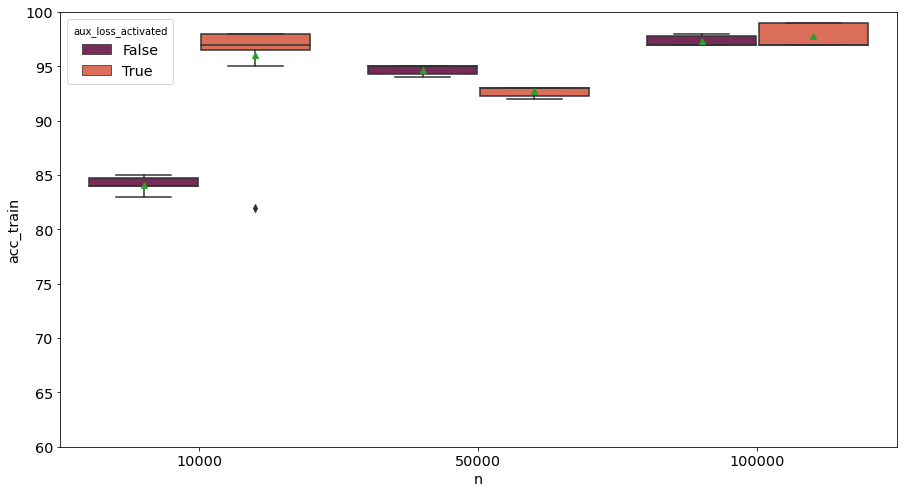

In [28]:
plt.figure(figsize=(15,8))
plt.ylim(60,100)
ax = sns.boxplot(x="n", y="acc_train", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data)

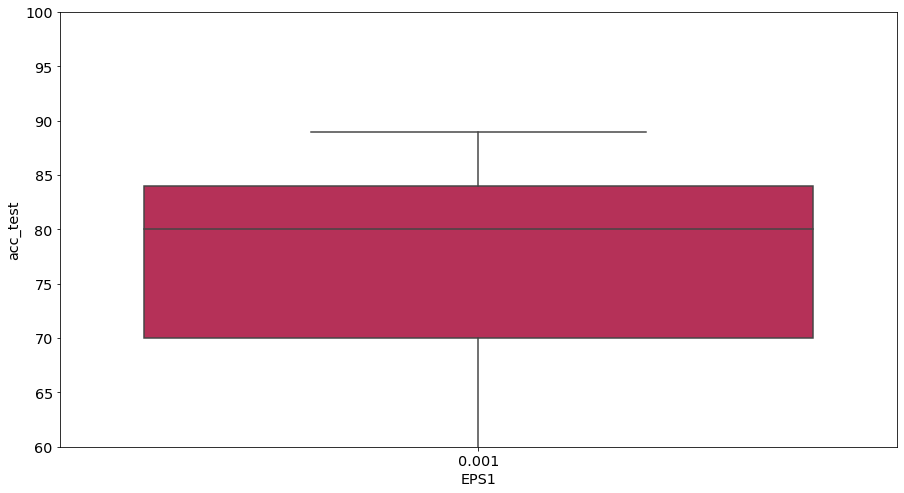

In [10]:
plt.figure(figsize=(15,8))

plt.ylim(60,100)

ax = sns.boxplot(x="EPS1", y="acc_test", data=data,palette='rocket')

In [33]:
data = pd.read_csv("17-04-2021-results.csv")
data = data[data.opt!=3]

35
30


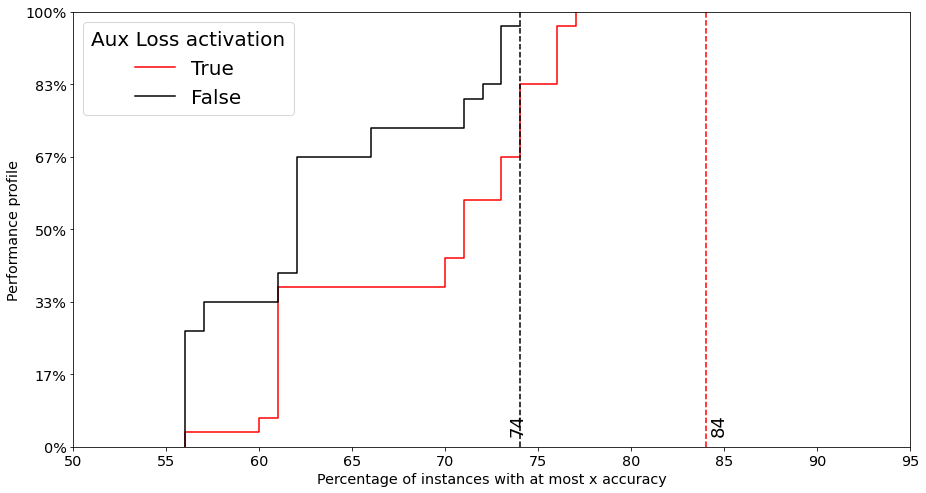

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


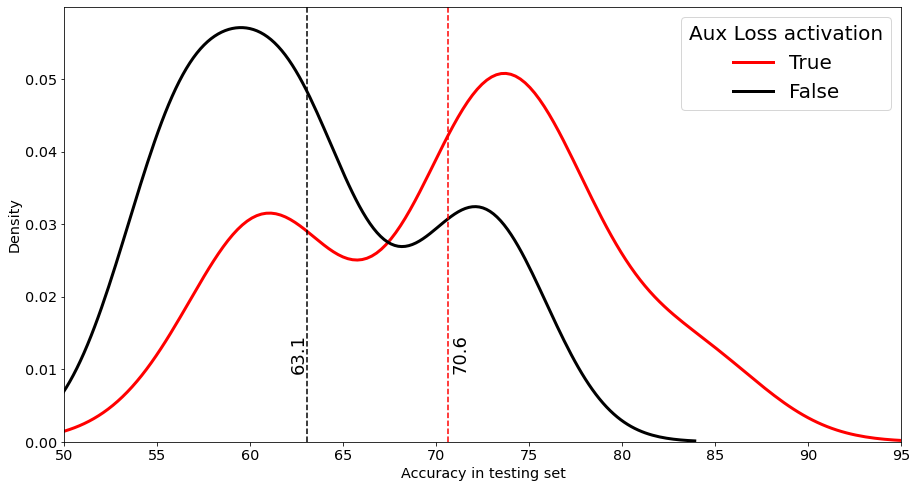

In [27]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size), color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
plt.xlabel('Percentage of instances with at most x accuracy')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20, loc='upper left')

plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')


max1 = np.round(data[data.aux_loss_activated==True]['acc_test'].max(),1)
max2 = np.round(data[data.aux_loss_activated==False]['acc_test'].max(),1)
plt.text(max1+0.2, 1,str(max1),rotation=90, fontsize=18)
plt.text(max2-0.6, 1,str(max2),rotation=90, fontsize=18)


plt.ylabel('Performance profile')
plt.xlim(50,95)
plt.ylim(0,subset.shape[0])
plt.show()



plt.figure(figsize=(15,8))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(50,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_test'].mean(),1)
plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


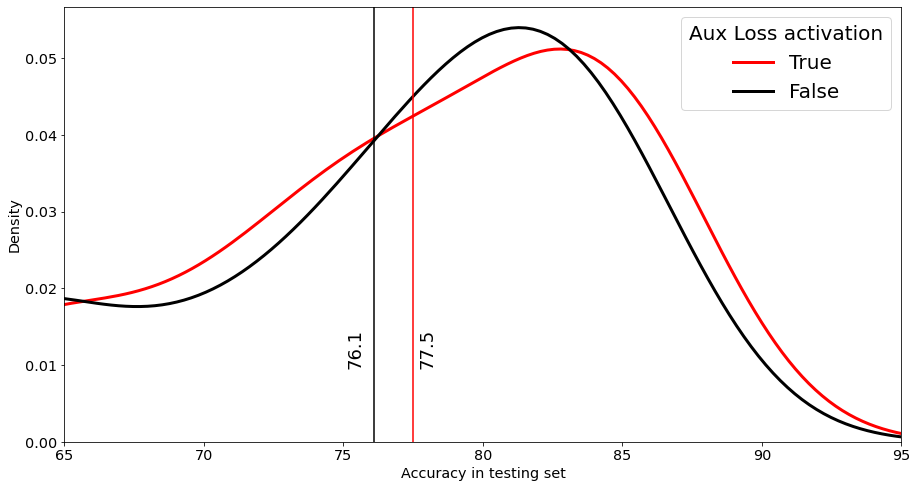

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


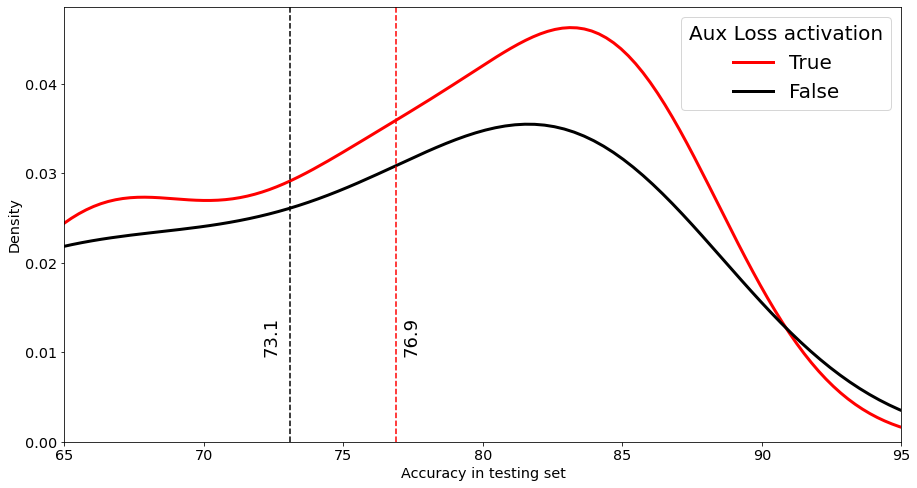

In [35]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
opt = 1
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)
plt.axvline(x=mean1, ymin=0., ymax=1, color='red')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()


fig, ax = plt.subplots(figsize=(15,8))
opt = 2
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )


mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)

plt.axvline(x=mean1, ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black', linestyle='dashed')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

In [18]:
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
137,137,99,88,0.050,256,4,False,0.00010,100000,3
29,29,99,87,0.100,256,4,False,0.00100,100000,3
178,178,99,86,0.050,512,4,False,0.01000,100000,2
136,136,99,86,0.050,256,4,False,0.00010,100000,2
171,171,99,86,0.050,512,4,False,0.00100,100000,1
...,...,...,...,...,...,...,...,...,...,...
283,283,97,57,0.025,512,4,False,0.00001,10000,2
181,181,97,56,0.050,512,4,False,0.00010,10000,2
88,88,91,47,0.100,512,4,False,0.00010,100000,2
232,232,91,47,0.025,256,4,False,0.00010,100000,2


In [19]:
data_aux = data[(data.aux_loss_activated==True) & (data.batch_size>64) & (data.n>10000)]

In [20]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
147,147,99,88,0.050,512,4,True,0.00100,100000,1
4,4,99,88,0.100,256,4,True,0.00100,100000,2
23,23,99,87,0.100,256,4,True,0.00001,100000,3
251,251,99,87,0.025,512,4,True,0.01000,100000,3
245,245,99,87,0.025,512,4,True,0.00100,100000,3
...,...,...,...,...,...,...,...,...,...,...
16,16,99,73,0.100,256,4,True,0.00010,100000,2
203,203,99,71,0.025,256,4,True,0.01000,100000,3
105,105,98,70,0.050,256,4,True,0.01000,100000,1
160,160,98,66,0.050,512,4,True,0.00010,100000,2


In [21]:
data_non_aux = data[(data.aux_loss_activated==False) & (data.batch_size>64) & (data.n>10000)]
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
137,137,99,88,0.050,256,4,False,0.00010,100000,3
29,29,99,87,0.100,256,4,False,0.00100,100000,3
136,136,99,86,0.050,256,4,False,0.00010,100000,2
83,83,99,86,0.100,512,4,False,0.01000,100000,3
173,173,99,86,0.050,512,4,False,0.00100,100000,3
...,...,...,...,...,...,...,...,...,...,...
286,286,99,71,0.025,512,4,False,0.00001,100000,2
46,46,98,67,0.100,256,4,False,0.00001,100000,2
268,268,92,47,0.025,512,4,False,0.00100,100000,2
232,232,91,47,0.025,256,4,False,0.00010,100000,2


In [22]:
np.round(data_aux.acc_train.mean(),2), np.round(data_aux.acc_test.mean(),2)

(98.82, 82.18)

In [23]:
data_non_aux.acc_train.mean(), data_non_aux.acc_test.mean()

(98.63380281690141, 80.53521126760563)

In [24]:
data_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
3,3,99,87,0.1,256,4,True,0.001,100000,1
4,4,99,88,0.1,256,4,True,0.001,100000,2
5,5,99,83,0.1,256,4,True,0.001,100000,3
9,9,99,80,0.1,256,4,True,0.010,100000,1
10,10,99,84,0.1,256,4,True,0.010,100000,2


In [25]:
data_non_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
27,27,98,72,0.1,256,4,False,0.001,100000,1
28,28,99,84,0.1,256,4,False,0.001,100000,2
29,29,99,87,0.1,256,4,False,0.001,100000,3
33,33,99,79,0.1,256,4,False,0.010,100000,1
34,34,99,85,0.1,256,4,False,0.010,100000,2


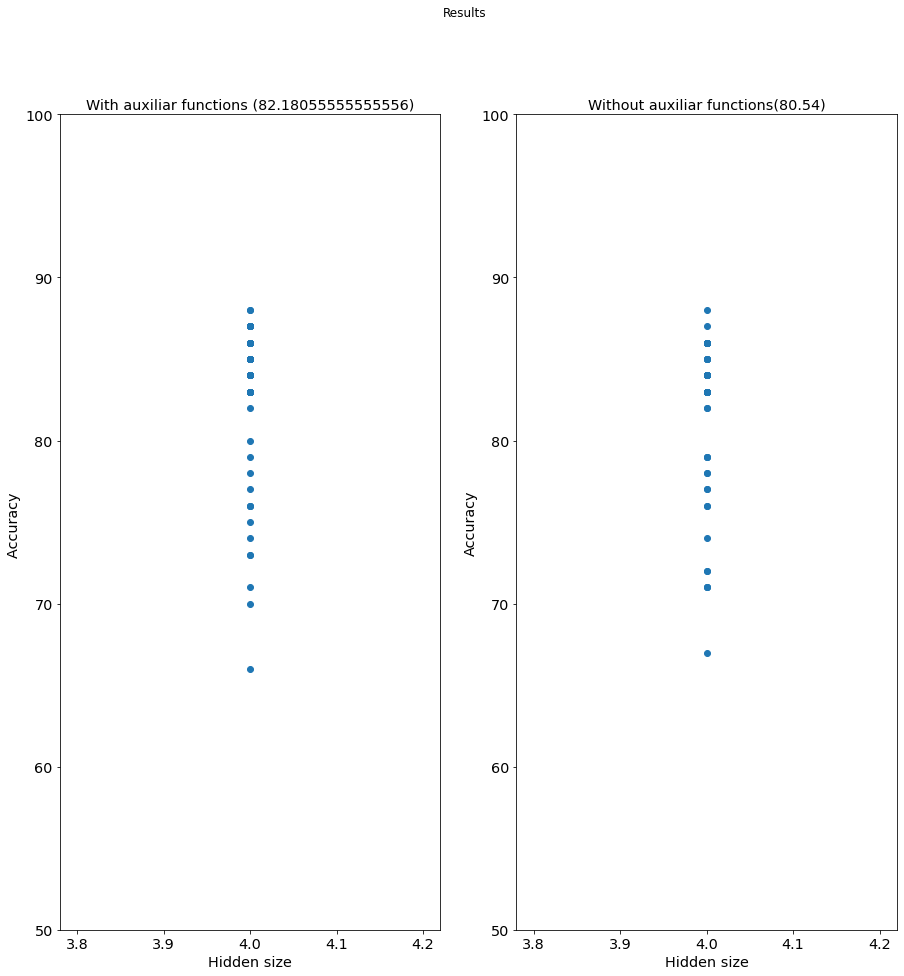

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.hidden_size, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.hidden_size, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('Hidden size')
ax2.set_xlabel('Hidden size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

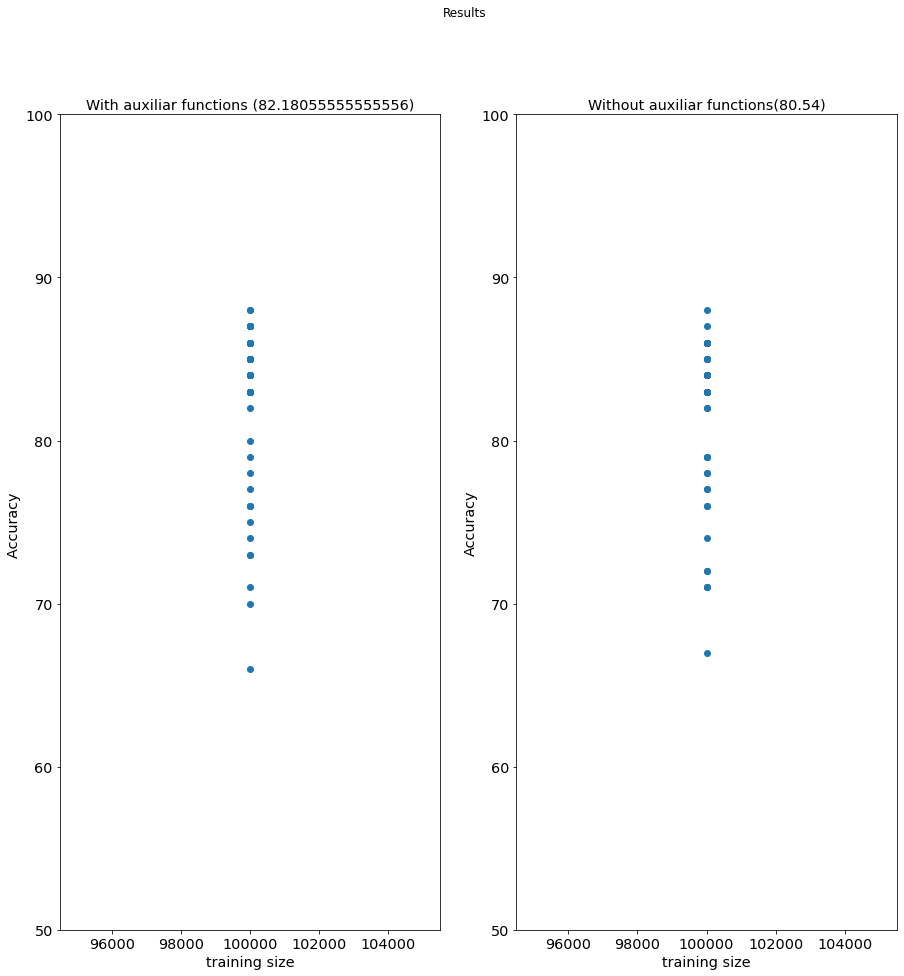

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.n, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.n, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

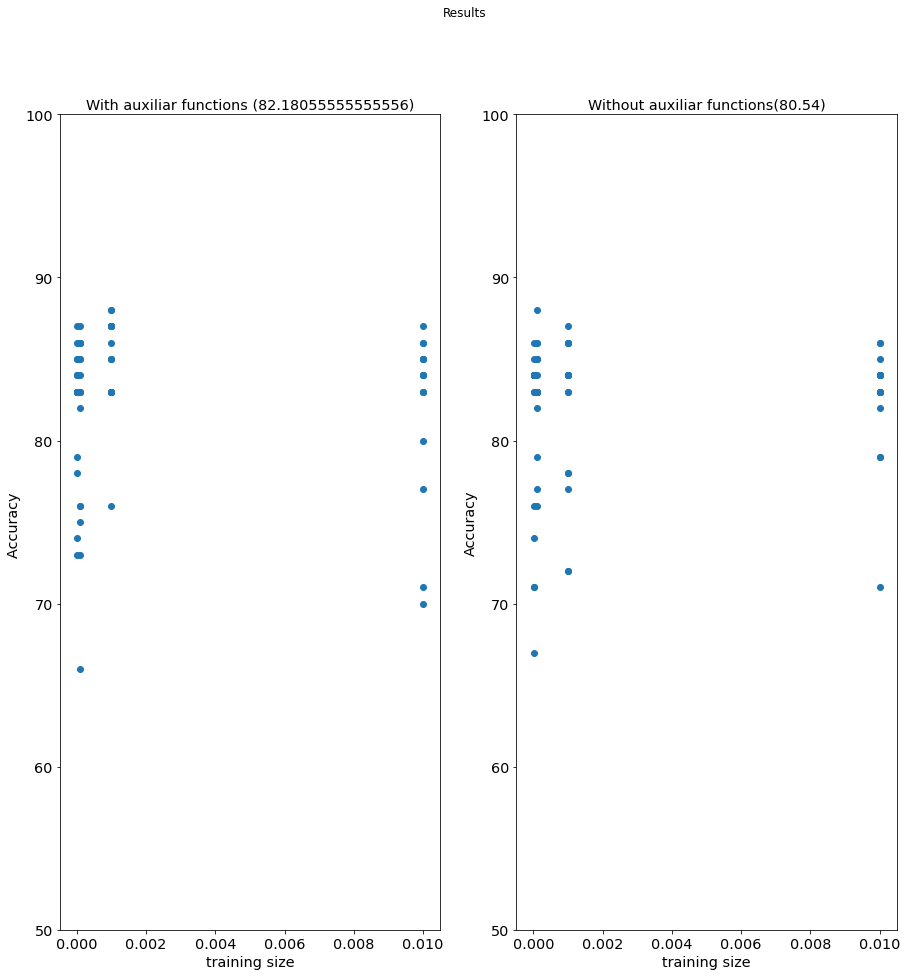

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.EPS1, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.EPS1, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

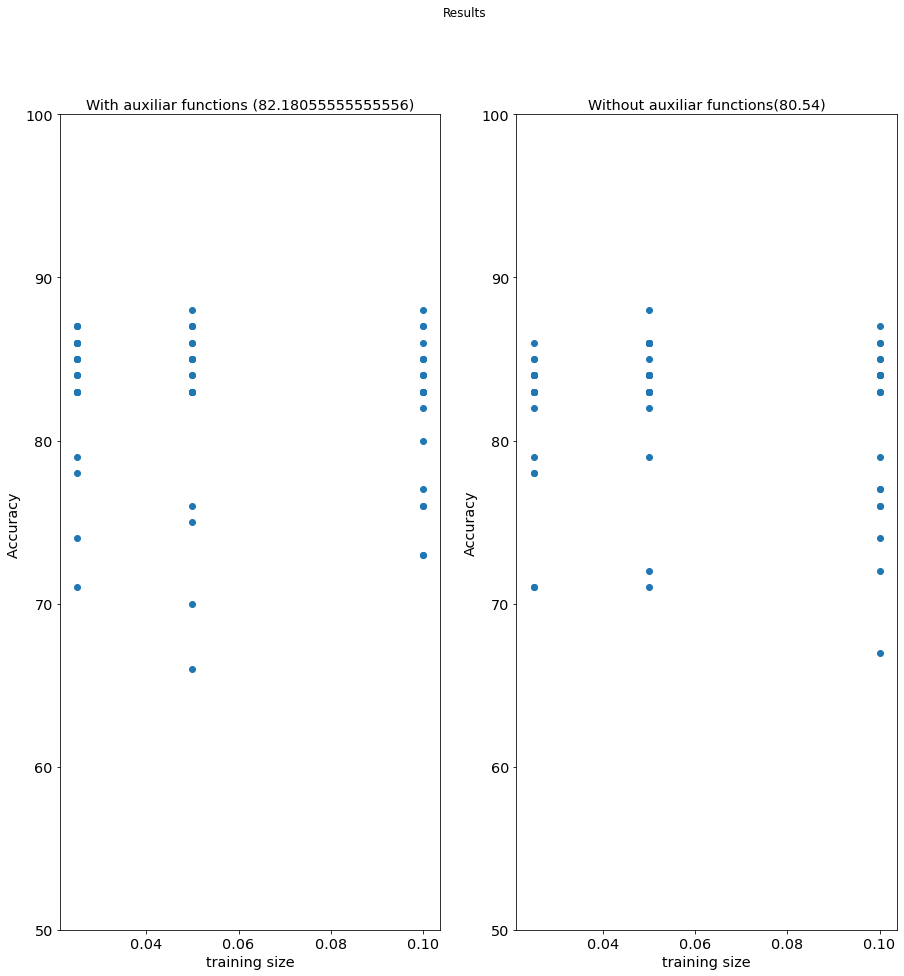

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [30]:
data_aux.epsilon.unique()

array([0.1  , 0.05 , 0.025])

In [31]:
data2 = pd.read_csv("06-04-2021-results.csv")

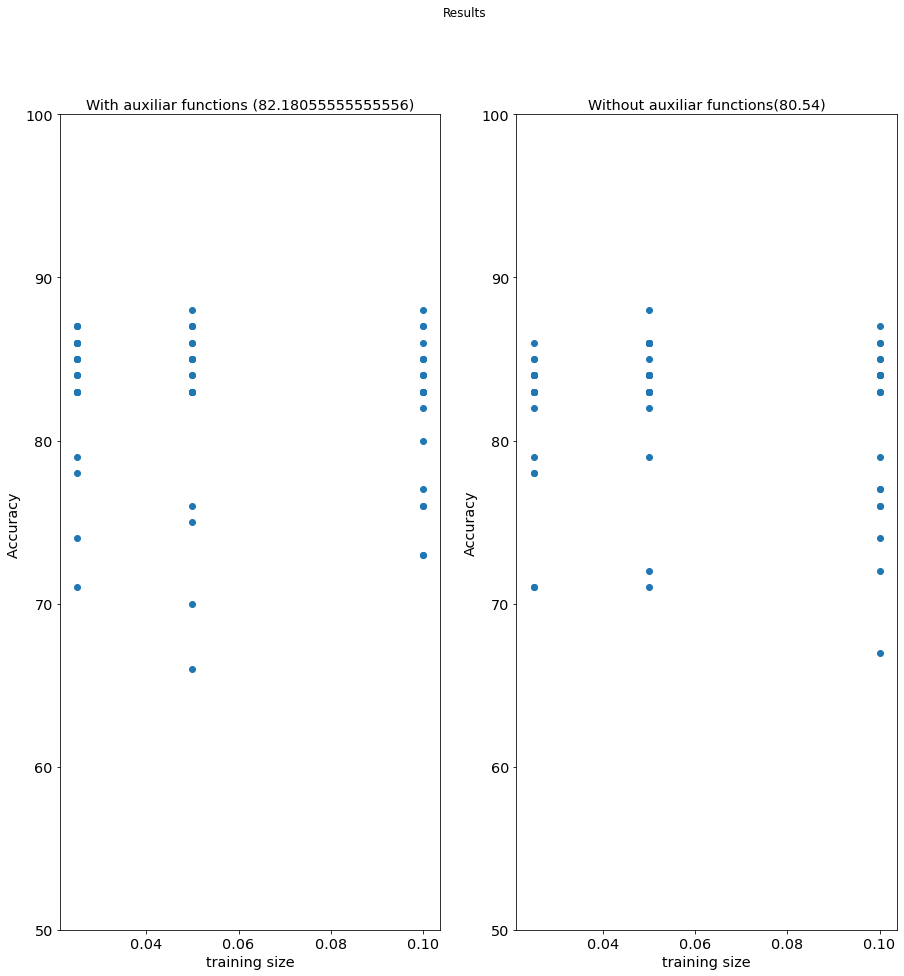

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()